In [7]:
import matplotlib.pyplot as plt
import pandas as pd

In [8]:
subject_id = 1
experiment_id=1

eye_df_interp = pd.read_csv(f"exported_csv/eye_df_interp/eye_df_interp{subject_id:03}-{experiment_id:03}.csv")


# 試行 0〜7 のデータのみ抽出
filtered_df = eye_df_interp[eye_df_interp['trial'].between(0, 7)].copy()

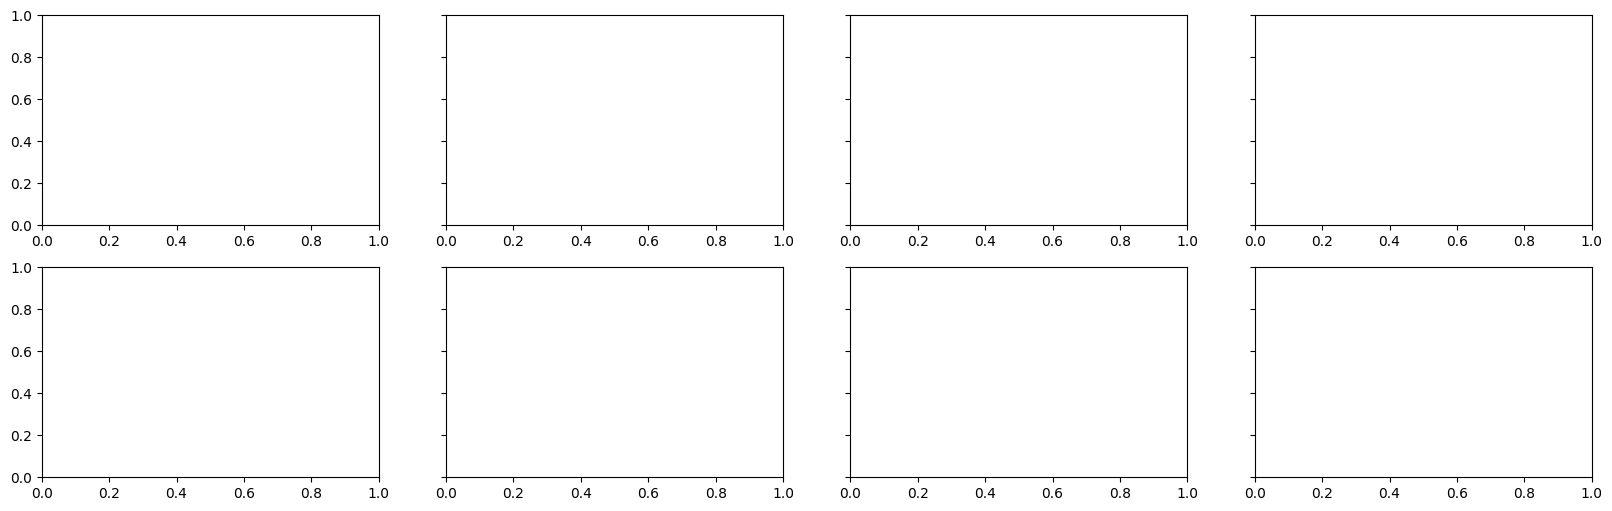

In [9]:
# 試行番号一覧を取得
trials = sorted(filtered_df['trial'].unique())

# プロットの準備（2行×4列）
fig, axes = plt.subplots(2, 4, figsize=(20, 6), sharey=True)
axes = axes.flatten()


In [10]:
for i, trial_num in enumerate(trials):
    # 該当試行のデータを取得
    trial_data = filtered_df[filtered_df['trial'] == trial_num].copy()
    if trial_data.empty:
        continue

    # 時間を正規化（各試行の先頭を0秒にする）
    start_time = trial_data['epoch_sec'].min()
    trial_data['time_norm'] = trial_data['epoch_sec'] - start_time

    # validity_interp をバイナリ化（0: invalid, 1: valid or interpolated）
    trial_data['is_valid'] = trial_data['validity_interp'].apply(lambda x: 1 if x in [1, 2] else 0)

    # プロット先の軸を取得
    ax = axes[i]

    # ステップ状プロット（矩形波）
    ax.step(trial_data['time_norm'], trial_data['is_valid'] * 1.5, where='post', color='blue', linewidth=1.5)

    # 補完データ（validity_interp == 1）に網掛け
    interp_data = trial_data[trial_data['validity_interp'] == 1]
    for x in interp_data['time_norm']:
        ax.axvspan(x, x + 0.05, color='orange', alpha=0.4)

    # 軸設定
    ax.set_title(f"Trial {trial_num}")
    ax.set_xlim(0, 40)
    ax.set_ylim(0, 2)
    ax.set_xlabel("Time (sec)")
    if i % 4 == 0:
        ax.set_ylabel("Validity")
    ax.set_yticks([0, 1.5])
    ax.set_yticklabels(['Invalid', 'Valid'])
    ax.grid(True)

In [11]:
# 全体タイトルとレイアウト調整
plt.suptitle("Trial-wise Validity (0–40s, Interpolation Highlighted)", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

<Figure size 640x480 with 0 Axes>